<a href="https://colab.research.google.com/github/gabriel7268/Notebooks/blob/main/C%C3%B3pia_de_Avalia%C3%A7%C3%A3o_1_Grupo_J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação 1 - ENGD02
## Desafio: Perspectivas do COVID-19  

### Cliente 4: ONG de refugiados sul-americanos;

####Hipótese 1: Países mais desenvolvidos estão mais aptos para receber refugiados? 

Grupo J: André Vianna, Caren Araújo, Gabriel Anunciação, Gustavo Gonçalves  

### 1 - Pacotes

In [ ]:
# Pacotes
# As próximas 4 linhas são para carregar os pacotes que serão utilizados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Imprimir mensagem de confirmação do carregamento dos pacotes
print('Pacotes carregados com sucesso!') 

Pacotes carregados com sucesso!


### 2 - Carregando dados

In [ ]:
# Carregando dados
## Link do raw data do github
link = 'https://github.com/mascalmeida/auladatascience/blob/main/dataset/owid-covid-data.xlsx?raw=true'
## Carregando o dataset
dt = pd.read_excel(link)
## Visualizando o cabeçalho do dataset
dt.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


### 3 - Selecionando variáveis & Lidando com valores faltantes

Tendo em vista que a ONG é sul-americana, achamos mais viável trabalhar com países da América do Sul, para conter custos e facilitar o contato com os governos.

No decorrer das análises, percebemos que o Brasil se torna uma variável muito distoante dos demais países, sendo assim, excluímos o mesmo de algumas análises gráficas.
Para tal, utilizamos o filtro abaixo.

In [ ]:
# Filtrando o Conjunto de Dados, o DataFrame dt_sa contém apenas Países da América do Sul
dt_sa = dt[(dt['continent'] == 'South America')]
# Filtrano o Conjunto de Dados, retirando o Brasil pelo fato de que os dados são muito diferentes dos demais países
dt_bra = dt_sa[(dt['iso_code'] != 'BRA')]
# Estatísticas do Índice de Desenvolvimento Humano (IDH) dos países da América do Sul
dt_sa['human_development_index'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


count    4867.000000
mean        0.764846
std         0.050900
min         0.682000
25%         0.728000
50%         0.765000
75%         0.817000
max         0.851000
Name: human_development_index, dtype: float64

In [ ]:
# Seleção de variáveis
## Selecionando variáveis para investigação
df = dt.loc[:, ['iso_code', 'continent', 'location', 
                'date', 'total_cases', 'new_cases', 
                'total_deaths', 'new_deaths', 
                'stringency_index', 'population']].dropna().reset_index(drop=True)
display(df.head())

## Informações gerais das variáveis
display(dt.info())

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population
0,AFG,Asia,Afghanistan,2020-03-22,34.0,4.0,1.0,1.0,41.67,38928341.0
1,AFG,Asia,Afghanistan,2020-03-23,41.0,7.0,1.0,0.0,41.67,38928341.0
2,AFG,Asia,Afghanistan,2020-03-24,43.0,2.0,1.0,0.0,50.93,38928341.0
3,AFG,Asia,Afghanistan,2020-03-25,76.0,33.0,2.0,1.0,59.26,38928341.0
4,AFG,Asia,Afghanistan,2020-03-26,80.0,4.0,3.0,1.0,59.26,38928341.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79667 entries, 0 to 79666
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               79667 non-null  object 
 1   continent                              75781 non-null  object 
 2   location                               79667 non-null  object 
 3   date                                   79667 non-null  object 
 4   total_cases                            78097 non-null  float64
 5   new_cases                              78095 non-null  float64
 6   new_cases_smoothed                     77094 non-null  float64
 7   total_deaths                           68648 non-null  float64
 8   new_deaths                             68806 non-null  float64
 9   new_deaths_smoothed                    77094 non-null  float64
 10  total_cases_per_million                77673 non-null  float64
 11  ne

None

Hipótese: países mais desenvolvidos estão mais preparados a receber refugiados


Considerar Países mais desenvolvidos os 25% com maiores IDH, sendo o 3° quartil igual a 0.817, logo: idh > 0.817   

,location,human_development_index
1,Chile,0.851
2,Argentina,0.845
3,Uruguay,0.817


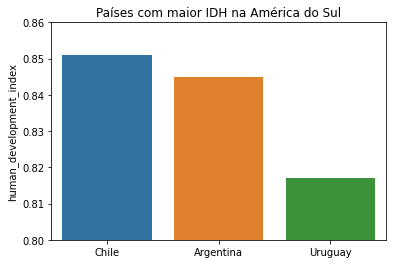

In [ ]:
# Filtrando os dados, o DataFrame dt_h1 contém os países da América do Sul com IDH maior ou igual à 0.817
dt_h1 = dt.loc[(dt['human_development_index'] >= 0.817) & (dt['continent'] == 'South America')
                .reset_index(drop=True)]
# Organizando os dados, o DataFrame dt_ranking contém, em ordem decrescente pelo IDH, os países com IDH maior ou igual à 0.817 e seus respectivos IDH 
dt_ranking = dt_h1.drop_duplicates('location')[['location','human_development_index']].sort_values('human_development_index', ascending=False).reset_index(drop=True, col_level=1)
# Atualizando o índice do DataFrame dt_ranking, começando em 1
dt_ranking.index = np.arange(1, len(dt_ranking) + 1)
# Imprimindo o DataFrame dt_ranking
display(dt_ranking)

# Imprimindo gráfico de barras do DataFrame dt_ranking, Países no eixo "x" e IDH no eixo "y"
t = sns.barplot(x="location", y="human_development_index", data = dt_ranking) 
# Limite inferior e superior do eixo "y"
t.set_ylim(0.8, 0.86)
# Nome do eixo "x", vazio porque os próprios países é suficiente
plt.xlabel('')
# Nome do eixo "Y"
plt.title('Países com maior IDH na América do Sul')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,total_cases_per_million,total_deaths_per_million,reproduction_rate,total_tests_per_thousand,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,hospital_beds_per_thousand,life_expectancy,IDH,País
location,,,,,,,,,,,,
Argentina,7545330.706,189801.753,428.92,21799.060,259.14,203.91,54.00,33371.72,2305.00,35344.87,0.845,Argentina
Bolivia,3810144.478,195311.341,401.12,9419.020,49.30,37.74,11.51,26922.83,430.10,27960.41,0.718,Bolivia
Brazil,8723587.252,238725.110,453.76,239.485,279.44,223.54,55.84,26246.12,891.00,30731.40,0.765,Brazil
Chile,8789365.983,224239.495,434.16,79575.725,1744.77,1303.87,440.89,29904.07,860.88,32713.44,0.851,Chile
Colombia,7057792.088,194980.026,429.74,34756.781,74.04,58.76,6.19,30234.10,677.16,30606.84,0.767,Colombia
Ecuador,3060253.324,199974.489,422.65,8931.019,13.66,11.04,2.65,27543.55,601.50,30881.01,0.759,Ecuador
Guyana,1695654.115,43981.425,336.96,0.000,11.59,11.59,0.00,27608.89,624.00,27264.90,0.682,Guyana
Paraguay,3205082.346,64982.978,411.33,16991.701,7.14,6.81,0.33,27824.59,513.50,29328.75,0.728,Paraguay
Peru,8012992.565,299129.002,449.80,21874.320,79.95,59.64,20.30,31833.83,728.00,34916.70,0.777,Peru


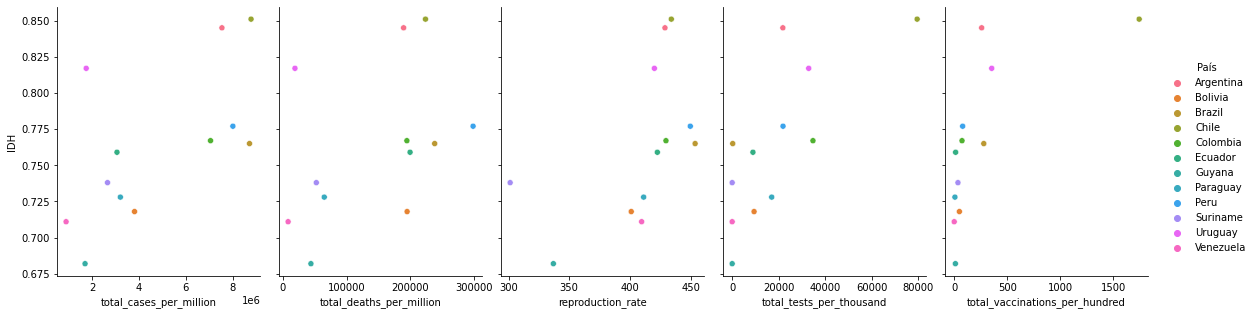

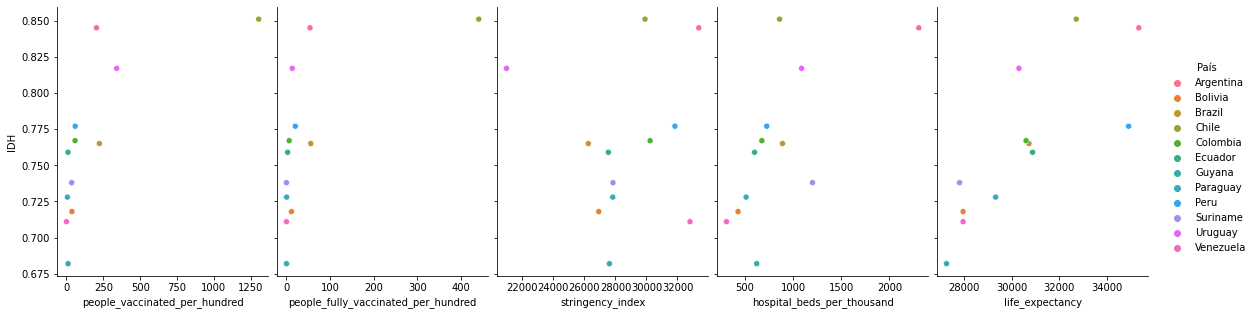

In [ ]:
# Por se tratar de uma série temporal, agrupamos os dados por países, somando os seus valores individuais
dt_h = dt_sa.groupby(['location']).sum()
# Selecionamos as variáveis que iremos analisar e adicionamos ao DataFrame dt_u
dt_u = dt_h[['total_cases_per_million', 'total_deaths_per_million', 'reproduction_rate', 'total_tests_per_thousand', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'stringency_index', 'hospital_beds_per_thousand',	'life_expectancy']]
# Adicionamos o IDH e o nome de cada País
dt_u['IDH'] = [x for x in dt_sa.drop_duplicates('location')['human_development_index']]
dt_u['País'] = [x for x in dt_sa.drop_duplicates('location')['location']]
# Retiramos os valores faltantes
dt_u = dt_u.dropna()
# Imprimimos o DataFrame
display(dt_u)
# Imprimimos o gráfico de dispersão em matriz para analisarmos a correlação entre as variaveis e o IDH
g = sns.pairplot(
    dt_u,
    y_vars=["IDH"],
    x_vars=['total_cases_per_million', 'total_deaths_per_million', 'reproduction_rate', 'total_tests_per_thousand', 'total_vaccinations_per_hundred'],
    hue = 'País',
    aspect=1.3,
)
# Segunda parte para não ficar muito longo
h = sns.pairplot(
    dt_u,
    y_vars=["IDH"],
    x_vars=['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'stringency_index', 'hospital_beds_per_thousand',	'life_expectancy'],
    hue = 'País',
    aspect=1.3,
)
# Definimos a altura da plotagem do gráfico
g.fig.set_figheight(5)
h.fig.set_figheight(5)

#dt_h2 = dt.loc[(dt['hosp_patients_per_million'] >= 0.817) & (dt['continent'] == 'South America').reset_index(drop=True)]

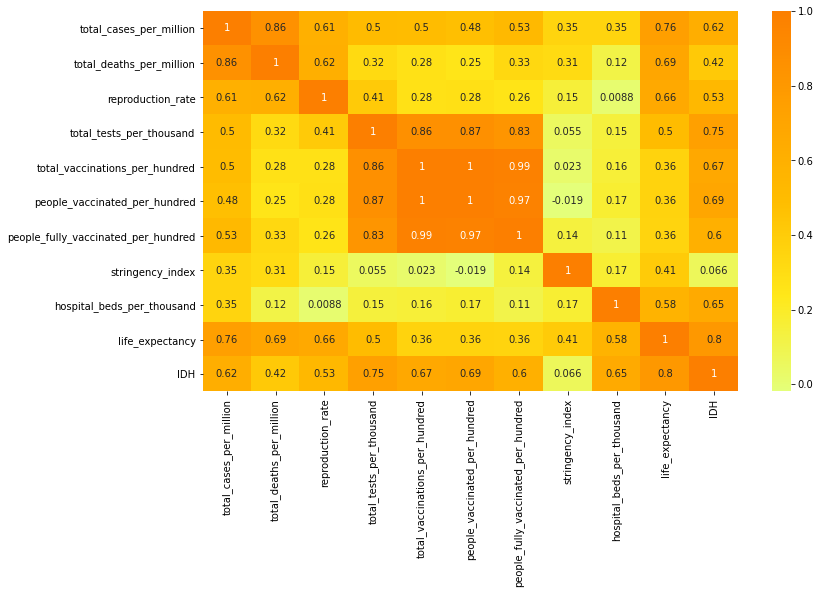

In [ ]:
# Definição do tamnho do gráfico
plt.subplots(figsize=(12,7))
# Gráfico de mapa de calor para analisarmos a correção entre as variaveis escolhidas. Quanto maior o valor (mais próximo de 1), maior a correlação.
sns.heatmap(dt_u.corr(), cmap='Wistia', annot=True)
plt.show()

In [ ]:
print(dt_u)

Para confirmar a nossa hipotese, selecionamos algumas variáveis que indicariam se os países estariam lidando melhor com a pandemia ou não, partindo do entendimento que países que lidam melhor com a pandemia, estariam mais preparados e disponíveis para abrigar refugiados neste momento. 

As variáveis definidas para realizarmos a análise incluíram: Taxa de vacinação, Disponibilidade dos leitos, Pacientes Hospitalizados, Testagem, Locais de Higienização disponíveis, Total de casos, Novos casos, Novas mortes e Medidas de Restrição.

As variáveis "people_vaccinated_per_hundred" e "hosp_patients_per_million" não foram analisadas pela falta de dados sobre os países da América do Sul e a variável "handwashing_facilities" foi analisada, porém não possui dados sobre os 3 países com maior IDH, sendo estes o foco da nossa análise.

As análises gráficas das variáveis utilizadas se encontram abaixo: 

## IDH X LEITOS DISPONÍVEIS


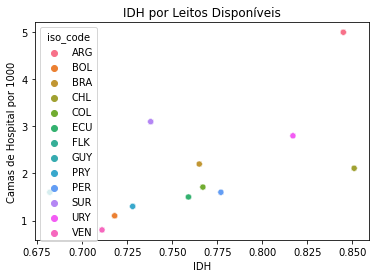

In [ ]:
#sns.scatterplot(x=dt_h2, y=dt_h2, hue=dt_h2['iso_code'])
sns.scatterplot(x=dt_sa['human_development_index'], y=dt_sa['hospital_beds_per_thousand'], hue=dt_sa['iso_code'])
plt.xlabel('IDH')
plt.ylabel('Camas de Hospital por 1000')
plt.title('IDH por Leitos Disponíveis')
plt.show();

##IDH X TESTE A CADA MIL HABITANTES

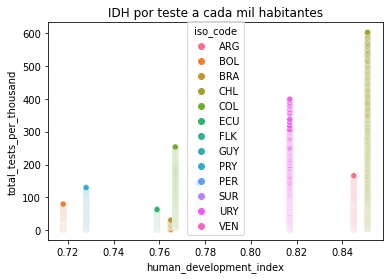

In [ ]:
sns.scatterplot(y=dt_sa['total_tests_per_thousand'], x=dt_sa['human_development_index'], hue=dt_sa['iso_code'])
plt.title('IDH por teste a cada mil habitantes')
plt.show();

## IDH X LOCAIS DE HIGIENIZAÇÃO DISPONÍVEIS

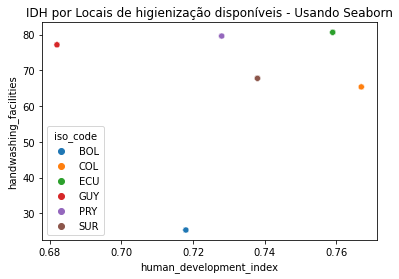

In [ ]:
dt_remove = dt_sa[dt_sa['handwashing_facilities'].isna()] # removendo paises que não tem informações sobre locais de higienização
dt_hw = dt_sa.drop(dt_remove.index)
sns.scatterplot(x=dt_hw['human_development_index'], y=dt_hw['handwashing_facilities'], hue=dt_hw['iso_code'])
plt.title('IDH por Locais de higienização disponíveis - Usando Seaborn')
plt.show();

##HISTORICO DE NOVOS CASOS NO TOP 3 PAÍSES 


In [ ]:
#separando as informações por país
dt_chile = dt_sa[dt_sa['iso_code']=='CHL']# chile 
dt_arg = dt_sa[dt_sa['iso_code']=='ARG']# argentina 
dt_ury = dt_sa[dt_sa['iso_code']=='URY']# uruguay

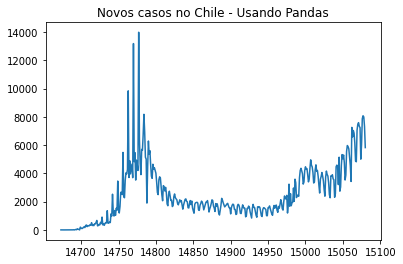

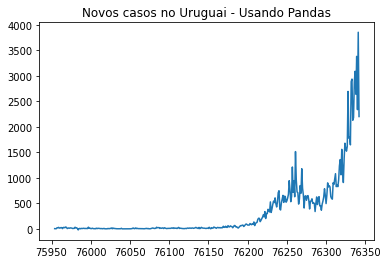

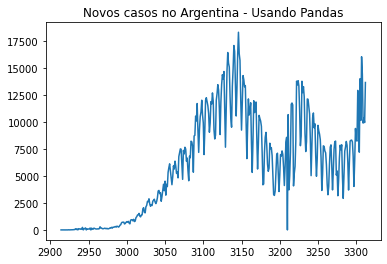

In [ ]:
dt_new = dt_chile.copy()
dt_new['new_cases'].plot();
plt.title('Novos casos no Chile - Usando Pandas')
plt.show()
dt_new = dt_ury.copy()
dt_new['new_cases'].plot();
plt.title('Novos casos no Uruguai - Usando Pandas')
plt.show()
dt_new = dt_arg.copy()
dt_new['new_cases'].plot();
plt.title('Novos casos no Argentina - Usando Pandas')
plt.show()

In [ ]:
## Estatísticas novos casos do Chile
dt_chile['new_cases'].describe()

count      408.000000
mean      2530.911765
std       1997.027654
min          0.000000
25%       1370.500000
50%       1915.500000
75%       3714.500000
max      13990.000000
Name: new_cases, dtype: float64

In [ ]:
## Estatísticas novos casos do Uruguai
dt_ury['new_cases'].describe()


count     389.000000
mean      308.375321
std       580.136456
min       -21.000000
25%         8.000000
50%        23.000000
75%       495.000000
max      3853.000000
Name: new_cases, dtype: float64

In [ ]:
## Estatísticas novos casos da Argentina
dt_arg['new_cases'].describe()

count      399.000000
mean      6032.979950
std       4658.406676
min          0.000000
25%       1174.500000
50%       6064.000000
75%       9438.000000
max      18326.000000
Name: new_cases, dtype: float64

# Novos Casos por Milhão vs Medidas de Restrição

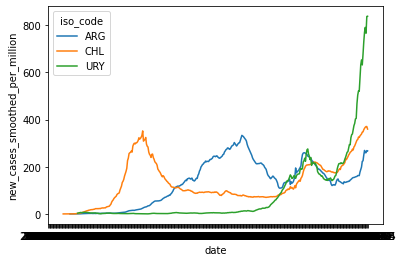

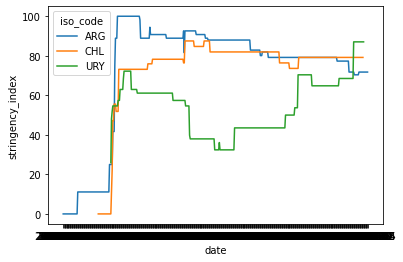

In [ ]:
casos = sns.lineplot(x=dt_h1['date'], y=dt_h1['new_cases_smoothed_per_million'], hue=dt_h1['iso_code'])
plt.show(casos)
restricao = sns.lineplot(x=dt_h1['date'], y=dt_h1['stringency_index'], hue=dt_h1['iso_code'])
plt.show(restricao)

In [ ]:
## Estatísticas Novos casos Top 3
dt_h1['new_cases_smoothed_per_million'].describe()

count    1181.000000
mean      116.363799
std       117.285964
min         0.015000
25%         6.169000
50%        92.636000
75%       187.859000
max       837.881000
Name: new_cases_smoothed_per_million, dtype: float64

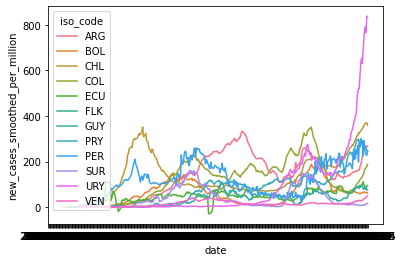

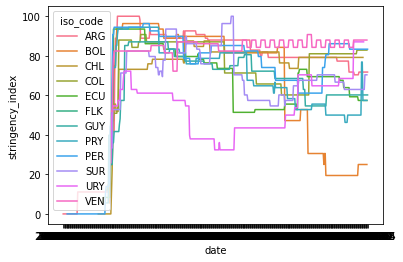

In [ ]:
casos = sns.lineplot(x=dt_bra['date'], y=dt_bra['new_cases_smoothed_per_million'], hue=dt_bra['iso_code'])
plt.show(casos)
restricao = sns.lineplot(x=dt_bra['date'], y=dt_bra['stringency_index'], hue=dt_bra['iso_code'])
plt.show(restricao)

# Novas Mortes

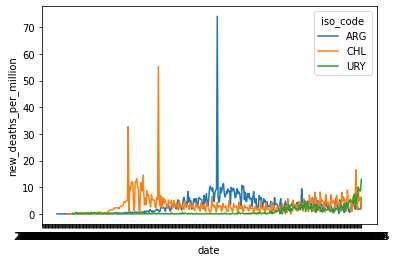

In [ ]:
mortes = sns.lineplot(x=dt_h1['date'], y=dt_h1['new_deaths_per_million'], hue=dt_h1['iso_code'])
plt.show(mortes)

In [ ]:
## Estatísticas Novas Mortes Top 3
dt_h1['new_deaths_per_million'].describe()


count    1148.000000
mean        2.454677
std         3.799808
min         0.000000
25%         0.288000
50%         1.648000
75%         3.465250
max        74.144000
Name: new_deaths_per_million, dtype: float64

##Conclusão

Ao analisar cada variável em função do desenvolvimento dos países, concluímos que em variáveis como disponibilidade de leitos e testagem da população, é possível observar uma tendência de crescimento nas mesmas no decorrer do crescimento do IDH, apesar de termos alguns pontos destoantes em ambas.
Contudo, quando analisamos os casos por milhão de habitantes e comparamos com os valores dos outros países, não conseguimos enxergar uma diferença tão significativa.

Com isso, **concluímos que a hipotese não poderia ser confirmada** a partir dos dados que obtemos, porém também concluímos que o país mais preparado para receber refugiados **atualmente** pelos pontos a seguir:


*   A Argentina é o país que mais dispõe de leitos hospitalares para os contaminados, dentre os países analisados
*   O IDH alto é um bom indício de que a economia do país suporta a sua população com qualidade de vida

*   A Argentina, dentre os 3 países mais desenvolvidos analisados, é o que mais está amenizando as medidas de restrição, o que indica uma melhora no quadro econômico do país.
*   A curva de novos casos da Argentina está mais amena, em comparação com as curvas do Chile e Uruguai



